In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

#plt.style.available

# Load data :

### JAFFE

In [ ]:
currentdata = "Jaffe"

jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [ ]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

In [ ]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [ ]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

In [ ]:
shape = X_train.shape[1]

### MNIST

In [ ]:
#currentdata = "mnist"

#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

In [34]:
currentdata = "MNIST"

mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [17]:
train_labels = pd.get_dummies(train_labels.reshape(len(train_labels))).values +0.
eval_labels = pd.get_dummies(eval_labels.reshape(len(eval_labels))).values +0.

In [18]:
# RANDOM SPLIT MNIST DATASET

X_train, X_test, y_train, y_test = train_test_split( train_data, train_labels, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  41250
Number of samples in test set :  13750


In [20]:
shape = X_train.shape[1]

# Neural network with Random initialisation

In [22]:
# CREATION DU RESEAU DE NEURONE

#sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(initializer([shape,100]))
b1 = tf.Variable(initializer([100]))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(initializer([100,50]))
b2 = tf.Variable(initializer([50]))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(initializer([50,10]))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [ ]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l , end=", ")
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

In [25]:
init1 = tf.contrib.layers.xavier_initializer()
init2 = tf.random_normal_initializer()
init3 = tf.zeros
inits = [init1, init2, init3]

acsList = []
lsList = []

for initializer, title in zip(inits, initsS):

    print(title)
    
    try:
        sess.close()
    except NameError:
        sess = None
    # CREATION DU RESEAU DE NEURONE
    sess = tf.Session()

    x = tf.placeholder(tf.float32, shape=[None, shape])

    # XAVIER INITIALIZER
    #initializer =  tf.contrib.layers.xavier_initializer()

    # NORMAL DISTRIBUTION
    #initializer = tf.random_normal_initializer()

    # ZEROS INITIALIZER
    #initializer = tf.zeros

    W1 = tf.Variable(initializer([shape,100]))
    b1 = tf.Variable(initializer([100]))

    y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

    W2 = tf.Variable(initializer([100,50]))
    b2 = tf.Variable(initializer([50]))

    y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

    W3 = tf.Variable(initializer([50,10]))
    b3 = tf.Variable(initializer([10]))

    y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

    y_ = tf.placeholder(tf.float32, shape=[None, 10])

    cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))

    LEARNING_RATE = 0.1

    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess.run(tf.global_variables_initializer())


    # TRAINING : 

    acs = []
    ls = []

    number_of_epoch = 1000

    for i in range(number_of_epoch):
        ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
        l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
        sess.run(training,feed_dict={x : X_train, y_ : y_train})
        acs.append(ac)
        ls.append(l)
        if(i%10 == 0):
            print("epoch : ", i, "/", number_of_epoch, end=", ")
            print("accuracy : " , ac, end=", ")
            print("loss : ",l )
    acsList.append(acs)
    lsList.append(ls)

xavier
epoch :  0 / 1000, accuracy :  0.10043637, loss :  4.090308
epoch :  10 / 1000, accuracy :  0.102181815, loss :  3.247471
epoch :  20 / 1000, accuracy :  0.12370909, loss :  3.231022
epoch :  30 / 1000, accuracy :  0.14756364, loss :  3.219519
epoch :  40 / 1000, accuracy :  0.19032727, loss :  3.2078788
epoch :  50 / 1000, accuracy :  0.2424, loss :  3.1958303
epoch :  60 / 1000, accuracy :  0.2917091, loss :  3.1832323
epoch :  70 / 1000, accuracy :  0.33643636, loss :  3.1699383
epoch :  80 / 1000, accuracy :  0.3725091, loss :  3.1557956
epoch :  90 / 1000, accuracy :  0.40690908, loss :  3.1406388
epoch :  100 / 1000, accuracy :  0.43585455, loss :  3.124291
epoch :  110 / 1000, accuracy :  0.45723635, loss :  3.1065617
epoch :  120 / 1000, accuracy :  0.47323635, loss :  3.087247
epoch :  130 / 1000, accuracy :  0.48887274, loss :  3.0661292
epoch :  140 / 1000, accuracy :  0.5034182, loss :  3.0429778
epoch :  150 / 1000, accuracy :  0.5123636, loss :  3.0175536
epoch :  

epoch :  330 / 1000, accuracy :  0.58967274, loss :  1.8892614
epoch :  340 / 1000, accuracy :  0.5952727, loss :  1.8657682
epoch :  350 / 1000, accuracy :  0.60123634, loss :  1.8431742
epoch :  360 / 1000, accuracy :  0.6063273, loss :  1.8214278
epoch :  370 / 1000, accuracy :  0.6115636, loss :  1.8004818
epoch :  380 / 1000, accuracy :  0.61570907, loss :  1.780292
epoch :  390 / 1000, accuracy :  0.6204364, loss :  1.7608174
epoch :  400 / 1000, accuracy :  0.62603635, loss :  1.7420202
epoch :  410 / 1000, accuracy :  0.63134545, loss :  1.7238648
epoch :  420 / 1000, accuracy :  0.63658184, loss :  1.7063177
epoch :  430 / 1000, accuracy :  0.64101815, loss :  1.6893481
epoch :  440 / 1000, accuracy :  0.6458909, loss :  1.6729269
epoch :  450 / 1000, accuracy :  0.6504, loss :  1.6570269
epoch :  460 / 1000, accuracy :  0.6539636, loss :  1.6416225
epoch :  470 / 1000, accuracy :  0.6570909, loss :  1.6266892
epoch :  480 / 1000, accuracy :  0.6605818, loss :  1.6122042
epoch

epoch :  650 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  660 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  670 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  680 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  690 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  700 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  710 / 1000, accuracy :  0.11461818, loss :  3.2493927
epoch :  720 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  730 / 1000, accuracy :  0.11461818, loss :  3.2493927
epoch :  740 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  750 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  760 / 1000, accuracy :  0.11461818, loss :  3.2493927
epoch :  770 / 1000, accuracy :  0.11461818, loss :  3.2493927
epoch :  780 / 1000, accuracy :  0.11461818, loss :  3.2493932
epoch :  790 / 1000, accuracy :  0.11461818, loss :  3.2493927
epoch :  800 / 1000, accuracy :  0.11461818, loss :  3.

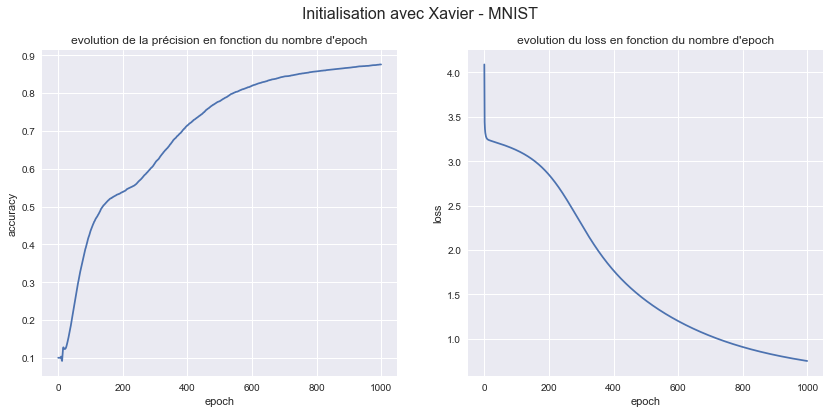

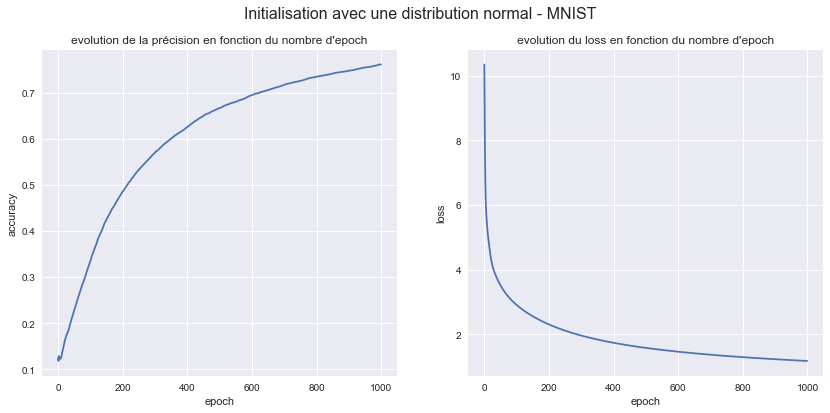

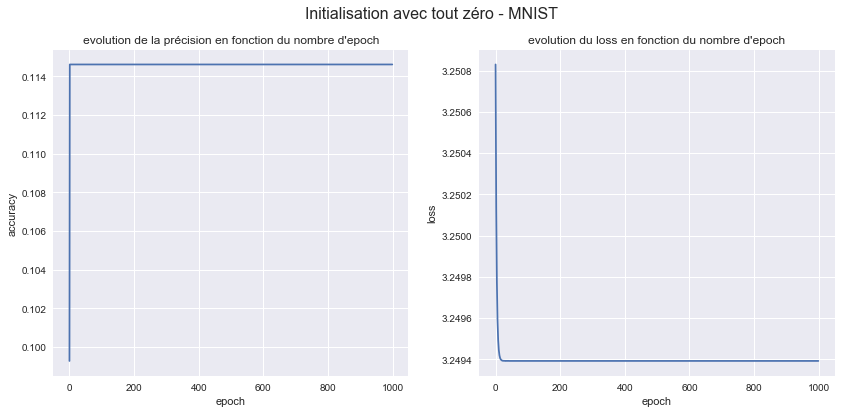

In [35]:
initsS = ["xavier", "distribution normal", "zéro"]
titles = ["Initialisation avec Xavier - "+currentdata,
          "Initialisation avec une distribution normal - "+currentdata,
          "Initialisation avec tout zéro - "+currentdata]

for acs, ls, title in zip(acsList, lsList, titles):
    plt.figure(figsize=(14, 6))

    ax = plt.subplot(121)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(acs)

    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("evolution de la précision en fonction du nombre d'epoch")

    ax = plt.subplot(122)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(ls)

    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("evolution du loss en fonction du nombre d'epoch")

    plt.suptitle(title, size=16)

    #plt.tight_layout()
    #plt.show()
    plt.savefig("plot/"+title+".png")
    

In [41]:
sess.close()

# AUTO ENCODER

In [42]:
sess = tf.Session()

learning_rate = 0.01

initializer = tf.contrib.layers.xavier_initializer()


X = tf.placeholder(tf.float32, shape=[None, shape])

# encoder layers : 

w1 = tf.Variable(initializer([shape, 100]))
b1 = tf.Variable(initializer([100]))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w1),b1))

w2 = tf.Variable(initializer([100, 50]))
b2 = tf.Variable(initializer([50]))

layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2),b2))

# decoder layers : 

w3 = tf.Variable(initializer([50, 100]))
b3 = tf.Variable(initializer([100]))

layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3),b3))

w4 = tf.Variable(initializer([100, shape]))
b4 = tf.Variable(initializer([shape]))

y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, w4),b4))

y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [43]:
for i in range(1000):

    sess.run(optimizer,feed_dict={X : X_train})
    l = sess.run(loss,feed_dict={X : X_train} )
    if i % 10 == 0 : 
        print("loss : ", l)

img_reconstructed = sess.run(y_pred, feed_dict={X : X_test})

# SHOW 10 reconstructed images :

for i in range(10):
    image = img_reconstructed[i].reshape([26,26])
    plt.imshow(image.transpose(),cmap = "gray")
    plt.show()

loss :  0.23641239
loss :  0.23620506
loss :  0.2358545
loss :  0.23526251
loss :  0.23426478
loss :  0.23258853
loss :  0.22978754
loss :  0.22514814
loss :  0.21757111
loss :  0.20546453
loss :  0.18676177
loss :  0.15949208
loss :  0.12470385
loss :  0.09303505
loss :  0.07660001
loss :  0.070895374
loss :  0.06887931
loss :  0.06805187
loss :  0.067672074
loss :  0.06748267
loss :  0.0673795
loss :  0.06967104
loss :  0.06858897
loss :  0.067554586
loss :  0.06681662
loss :  0.065445565
loss :  0.064388655
loss :  0.063902915
loss :  0.06359467
loss :  0.063331775
loss :  0.06302485
loss :  0.06261172
loss :  0.061853085
loss :  0.06051768
loss :  0.059084293
loss :  0.05773674
loss :  0.05698368
loss :  0.0565088
loss :  0.054919373
loss :  0.054309525
loss :  0.05250281
loss :  0.052178755
loss :  0.050735082
loss :  0.0503556
loss :  0.05054278
loss :  0.0490484


KeyboardInterrupt: 

## Training with autoencoder initialisation

In [44]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = w1
B1 = b1

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = w2
B2 = b2

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [45]:
# TRAINING : 

acs_AE = []
ls_AE = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs_AE.append(ac)
    ls_AE.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l )


epoch :  0 / 1000, accuracy :  0.09927273, loss :  3.4799697
epoch :  10 / 1000, accuracy :  0.22458182, loss :  3.2401454
epoch :  20 / 1000, accuracy :  0.20334545, loss :  3.2214682
epoch :  30 / 1000, accuracy :  0.2352, loss :  3.2098296
epoch :  40 / 1000, accuracy :  0.28167272, loss :  3.1979523
epoch :  50 / 1000, accuracy :  0.3184, loss :  3.1854842
epoch :  60 / 1000, accuracy :  0.34792727, loss :  3.1722758
epoch :  70 / 1000, accuracy :  0.3765091, loss :  3.1581736
epoch :  80 / 1000, accuracy :  0.39876363, loss :  3.1430123
epoch :  90 / 1000, accuracy :  0.4205091, loss :  3.1266136
epoch :  100 / 1000, accuracy :  0.4429818, loss :  3.1087859
epoch :  110 / 1000, accuracy :  0.4584, loss :  3.0893254
epoch :  120 / 1000, accuracy :  0.4746909, loss :  3.0680158
epoch :  130 / 1000, accuracy :  0.48894545, loss :  3.0446317
epoch :  140 / 1000, accuracy :  0.50094545, loss :  3.018943
epoch :  150 / 1000, accuracy :  0.51054543, loss :  2.9907234
epoch :  160 / 1000,

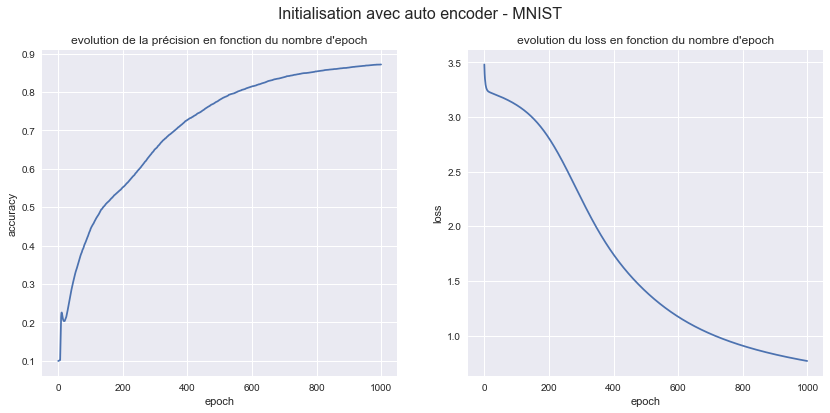

In [47]:
title = "Initialisation avec auto encoder - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_AE)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_AE)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png")

In [48]:
sess.close()

# PCA initialisation : 

In [49]:
# fir

data = X_train.copy()

m = data.mean(axis = 0 )
#data -= data.mean(axis = 0 )
cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R = evecs[:,idx]
inertia = evals[idx]

Rm =np.dot(m,R)
respca = np.dot(data, R) - Rm

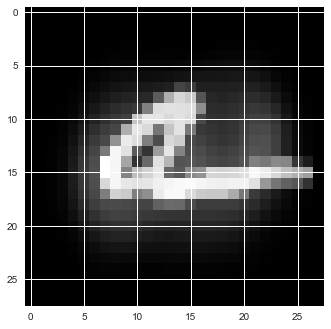

In [51]:
plt.imshow(np.dot(respca,np.linalg.inv(R) + m )[100].reshape([28,28]).T,cmap = "gray")
plt.show()

In [52]:
# Second PCA

data = respca.copy()
m2 = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R2 = evecs[:,idx]
inertia = evals[idx]

Rm2 =np.dot(m,R)
respca = np.dot(data, R) - Rm2

reconstructed = np.linalg.inv(R) + m2

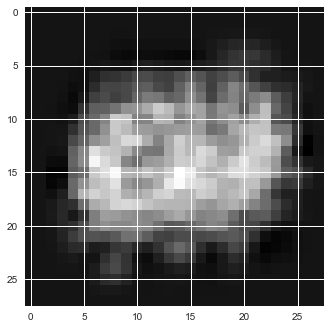

In [53]:
one = (np.dot(np.linalg.inv(R2),reconstructed) + m)[126].reshape([28,28])
plt.imshow(one.T,cmap ="gray")
plt.show()

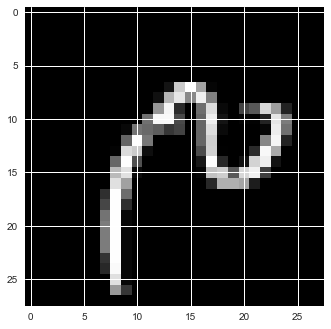

In [54]:
plt.imshow(X_train[25].reshape([28,28]).T,cmap= "gray")
plt.show()

In [55]:
# CONVERT TO FLOAT32

R = np.array(R,dtype="float32")[:,:100]
R2 = np.array(R2,dtype="float32")[:100,:50]
Rm = np.array(Rm,dtype="float32")[:100]
Rm2 = np.array(Rm2,dtype="float32")[:50]


In [56]:
R.shape

(784, 100)

## INITIALISATION WITH PCA

In [57]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = tf.Variable(R)
B1 = tf.Variable((-Rm))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = tf.Variable(R2)
B2 = tf.Variable(-Rm2)

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [58]:
# TRAINING : 

acs_PCA = []
ls_PCA = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs_PCA.append(ac)
    ls_PCA.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=', ')
        print("accuracy : " , ac, end=', ')
        print("loss : ",l )


epoch :  0 / 1000, accuracy :  0.09861818, loss :  3.488734
epoch :  10 / 1000, accuracy :  0.15389091, loss :  3.2425287
epoch :  20 / 1000, accuracy :  0.15810908, loss :  3.2261522
epoch :  30 / 1000, accuracy :  0.18276364, loss :  3.215405
epoch :  40 / 1000, accuracy :  0.2133091, loss :  3.2046986
epoch :  50 / 1000, accuracy :  0.25476363, loss :  3.1937332
epoch :  60 / 1000, accuracy :  0.29112726, loss :  3.1824143
epoch :  70 / 1000, accuracy :  0.33054546, loss :  3.1706529
epoch :  80 / 1000, accuracy :  0.36283636, loss :  3.1583552
epoch :  90 / 1000, accuracy :  0.3888, loss :  3.145424
epoch :  100 / 1000, accuracy :  0.41352728, loss :  3.1317549
epoch :  110 / 1000, accuracy :  0.43563637, loss :  3.117239
epoch :  120 / 1000, accuracy :  0.45621818, loss :  3.10176
epoch :  130 / 1000, accuracy :  0.47367272, loss :  3.0851946
epoch :  140 / 1000, accuracy :  0.48749092, loss :  3.0674143
epoch :  150 / 1000, accuracy :  0.4997091, loss :  3.0482852
epoch :  160 / 

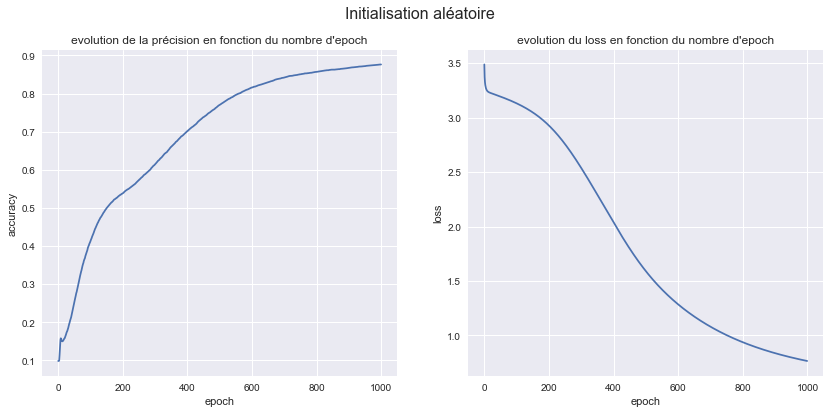

In [59]:
title = "Initialisation avec PCA - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_PCA)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_PCA)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle("Initialisation aléatoire", size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png")


In [61]:
sess.close()

# plot poster

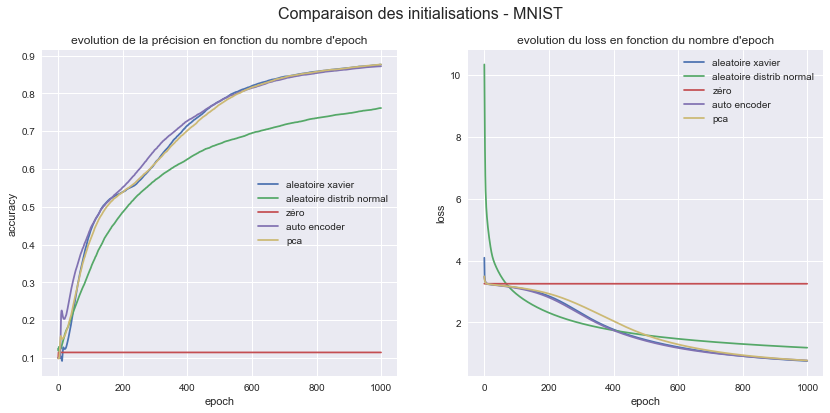

In [62]:
title = "Comparaison des initialisations - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()



plt.plot(acsList[0], label="aleatoire xavier")
plt.plot(acsList[1], label="aleatoire distrib normal")
plt.plot(acsList[2], label="zéro")
plt.plot(acs_AE, label="auto encoder")
plt.plot(acs_PCA, label="pca")

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")
plt.legend()


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(lsList[0], label="aleatoire xavier")
plt.plot(lsList[1], label="aleatoire distrib normal")
plt.plot(lsList[2], label="zéro")
plt.plot(ls_AE, label="auto encoder")
plt.plot(ls_PCA, label="pca")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")
plt.legend()

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png")
